In [70]:
import tensorflow as tf
from tensorflow.keras import models, layers, datasets
import numpy as np
import  matplotlib.pyplot as plt

In [72]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [73]:
x_test.shape

(10000, 32, 32, 3)

In [74]:
x_train.shape

(50000, 32, 32, 3)

In [75]:
y_train.shape

(50000, 1)

In [76]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [77]:
# converting 2D array into 1D array
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [78]:
y_train = y_train.reshape(-1,)

In [128]:
classes =['airplane','automobile', 'bird', 'cat', 'deer', 'dog','frog','horse', 'ship', 'truck']

In [80]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index].item()])

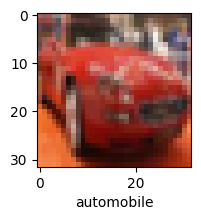

In [81]:
plot_sample(x_train, y_train, 5)

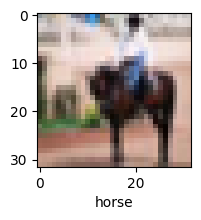

In [82]:
plot_sample(x_train, y_train, 11)

In [83]:
#normilization
x_train = x_train / 255.0
x_test = x_test / 255.0

In [85]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)


C:\Users\santo\anaconda3\envs\clean_tf_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 54ms/step - accuracy: 0.3080 - loss: 1.9230
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.4197 - loss: 1.6419
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.4559 - loss: 1.5573
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.4695 - loss: 1.4941
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.4955 - loss: 1.4344


In [88]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classsification report: \n, classification_report(y_test, y_pred_classes)')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
classsification report: 
, classification_report(y_test, y_pred_classes)


In [89]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

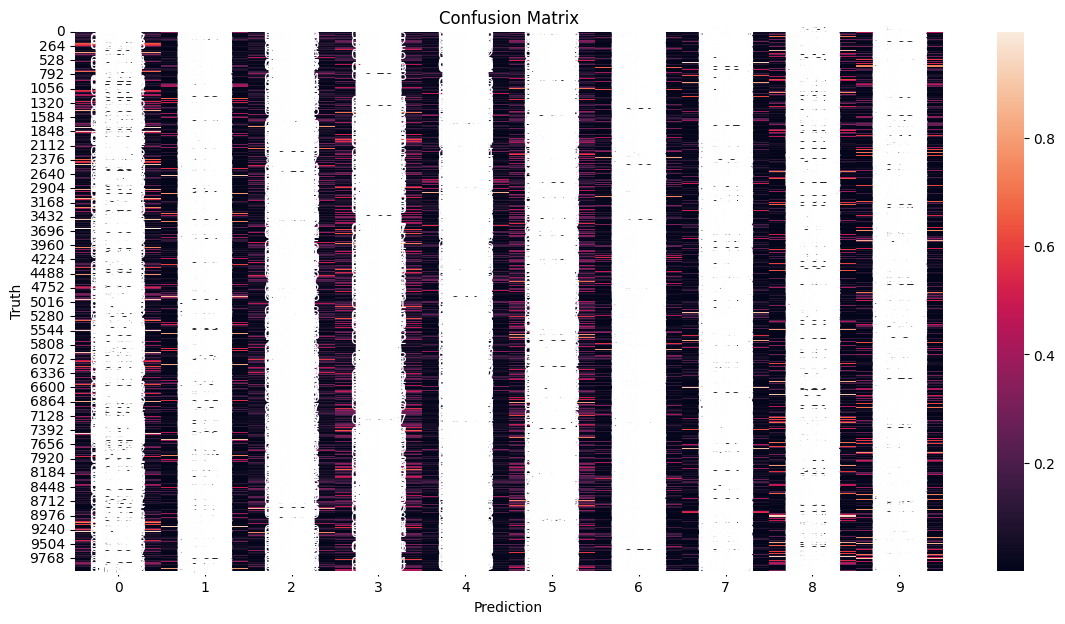

In [91]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show

In [92]:
#CNN

In [105]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    
])

In [109]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [110]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.3892 - loss: 1.6851
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6069 - loss: 1.1361
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6534 - loss: 0.9934
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6887 - loss: 0.8962
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7132 - loss: 0.8192
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7317 - loss: 0.7622
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7515 - loss: 0.7082
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7649 - loss: 0.6677
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7832 - loss: 0.6213
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7974 - loss: 0.5855


In [111]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7027 - loss: 0.9212


[0.9302250146865845, 0.7027000188827515]

In [112]:
y_prid = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[2.1088628e-02, 2.0516366e-02, 1.0511631e-01, 4.9904427e-01,
        1.7039318e-02, 2.1714206e-01, 7.0407972e-02, 1.6317191e-03,
        4.4619329e-02, 3.3940377e-03],
       [9.4898745e-02, 9.1098443e-02, 5.2340277e-03, 3.3467845e-03,
        2.2326743e-03, 1.1965642e-03, 2.7335712e-04, 1.1071207e-03,
        4.1276225e-01, 3.8785005e-01],
       [4.0788755e-01, 4.4755895e-02, 8.8892831e-03, 4.7342340e-03,
        3.5898548e-03, 2.6454637e-03, 1.2094633e-04, 2.1242455e-03,
        4.7073004e-01, 5.4522485e-02],
       [4.3610868e-01, 2.8755089e-02, 7.8786641e-02, 3.0239014e-02,
        4.0156882e-02, 2.5595827e-02, 9.4917312e-04, 3.2048836e-02,
        3.0546761e-01, 2.1892285e-02],
       [9.7126327e-03, 2.9873995e-03, 9.8848715e-02, 1.1232985e-01,
        4.7233260e-01, 1.2739782e-01, 1.3561840e-01, 1.2428791e-02,
        2.6922632e-02, 1.4211748e-03]], dtype=float32)

In [113]:
y_classes = [np.argmax(element) for element in y_prid]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

In [114]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
# check wether its predicting accurate images or not

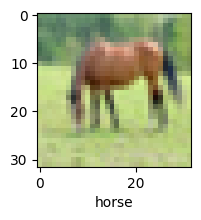

In [125]:
plot_sample(x_test, y_test, 60)

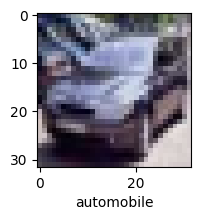

In [127]:
plot_sample(x_test, y_test, 290)

In [117]:
# check wether its predicting the correct classes or not

In [126]:
classes[y_classes[60]]

'horse'